## <center> Ivyberkeley-Case 2 </center>

#### Name: Ivy Chen X.Q

Train an effective classifier using the training dataset. You are free to choose your data processing approach, the classifier type, and tune the classifier's parameters as needed. You can use the sklearn package in Python for model implementation.

Make predictions on the testing dataset and generate a file containing only one column of labels (predicted 0 or 1), in the same order as the testing dataset.

In [ ]:
pip install imbalanced-learn

  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/92/e8/86c36e1b13007ca9c89381adac6c078cfc8fb71841a76c08a3fe3eca91d3/imbalanced_learn-0.12.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/257.7 kB ? eta -:--:--
   - -------------------------------------- 10.2/257.7 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/257.7 kB 640.0 kB/s eta 0:00:01
   ------------------------------ --------- 194.6/257.7 kB 2.3 MB/s eta 0:00:01
   ---------------------------------------- 257.7/257.7 kB 2.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.Collecting xgboost
  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 495.5 kB/s eta 0:03:22
   ---------------------------------------- 0.3/99.8 MB 2.8 MB/s eta 0:00:37
   ---------------------------------------- 0.6/99.8 MB 4.3 MB/s eta 0:00:23
   ---------------------------------------- 1.1/99.8 MB 6.0 MB/s eta 0:00:17
    --------------------------------------- 1.5/99.8 MB 7.0 MB/s eta 0:00:15
    --------------------------------------- 2.2/99.8 MB 8.1 MB/s eta 0:00:13
   - -------------------------------------- 2.8/99.8 MB 8.9 MB/s eta 0:00:11
   - -------------------------


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.impute import KNNImputer
import numpy as np

In [ ]:
df_train.describe()

,Unnamed: 0,0,1,2,3,4,5,6,7,8
count,652.00000,652.00000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000
mean,325.50000,0.50773,0.513037,0.491058,0.271380,0.504601,0.009172,0.503482,0.255245,0.098160
std,188.36047,0.12987,0.123411,0.090638,0.138654,0.047780,0.083864,0.054488,0.081545,0.297759
min,0.00000,0.19000,0.140000,0.210000,0.000000,0.500000,0.000000,0.130000,0.010000,0.000000
25%,162.75000,0.42000,0.430000,0.440000,0.170000,0.500000,0.000000,0.480000,0.220000,0.000000
50%,325.50000,0.49000,0.500000,0.510000,0.230000,0.500000,0.000000,0.510000,0.220000,0.000000
75%,488.25000,0.58000,0.580000,0.550000,0.340000,0.500000,0.000000,0.540000,0.270000,0.000000
max,651.00000,0.92000,1.000000,1.000000,0.800000,1.000000,0.830000,0.720000,0.740000,1.000000


In [ ]:
df_train.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8
0,0,0.81,0.85,0.47,0.37,0.5,0.0,0.56,0.22,1
1,1,0.70,0.58,0.53,0.39,0.5,0.0,0.59,0.22,1
2,2,0.72,0.73,0.41,0.28,0.5,0.0,0.44,0.22,1
3,3,0.78,0.69,0.44,0.26,0.5,0.0,0.54,0.22,1
4,4,0.74,0.82,0.46,0.24,0.5,0.0,0.48,0.22,1


In [ ]:
df_train.isnull().sum()

Unnamed: 0    0
0             0
1             0
2             0
3             0
4             0
5             0
6             0
7             0
8             0
dtype: int64

Column 'label_column_name' not found in the training DataFrame.
Column 'label_column_name' not found in the testing DataFrame.


ValueError: num must be an integer with 1 <= num <= 9, not 10

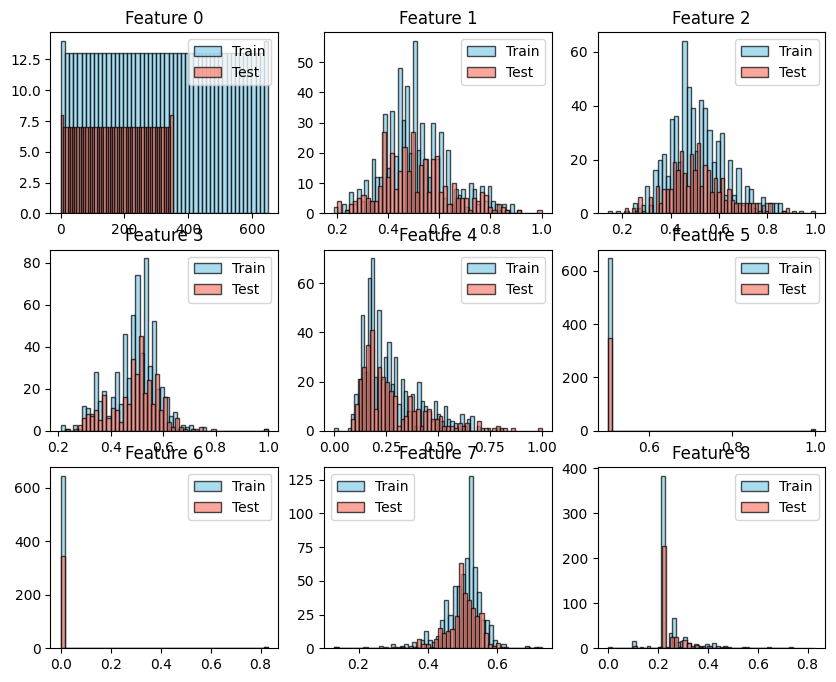

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test_attribute.csv')

# Specify the target column
label_column_name = 'label_column_name'

# Extract features
X_train = train_data.copy()
X_test = test_data.copy()

# Drop the target column if it exists
if label_column_name in X_train.columns:
    X_train.drop(columns=[label_column_name], inplace=True)
else:
    print(f"Column '{label_column_name}' not found in the training DataFrame.")

if label_column_name in X_test.columns:
    X_test.drop(columns=[label_column_name], inplace=True)
else:
    print(f"Column '{label_column_name}' not found in the testing DataFrame.")

# Histograms
plt.figure(figsize=(10, 8))
for i in range(X_train.shape[1]):
    plt.subplot(3, 3, i + 1)
    plt.hist(X_train.iloc[:, i], bins=50, color='skyblue', edgecolor='black', alpha=0.7, label='Train')
    plt.hist(X_test.iloc[:, i], bins=50, color='salmon', edgecolor='black', alpha=0.7, label='Test')
    plt.title("Feature " + str(i))
    plt.legend()
plt.tight_layout()
plt.show()


Upon analyzing the histograms of features in both the training and testing datasets, several insights can be gleaned. Firstly, the distributions of certain features may exhibit similarities between the training and testing datasets, suggesting consistency in the data across different sets. However, disparities in distributions may also be observed, indicating potential differences or discrepancies between the two datasets. These differences could be attributed to variations in data collection processes or inherent characteristics of the datasets. Furthermore, outlier detection can be facilitated through histogram analysis, identifying extreme values or anomalies that may require further investigation or preprocessing. Additionally, observing the spread and shape of distributions can offer insights into the nature of the features and their potential predictive power. Overall, thorough examination of the histograms provides valuable insights into the characteristics and behavior of the data, aiding in the development and evaluation of machine learning models.

In [ ]:
import pandas as pd
#train_file_path = "E:\\OneDrive - Wilfrid Laurier University\\CP610\\A2\\train.csv"
#test_file_path = "E:\\OneDrive - Wilfrid Laurier University\\CP610\\A2\\test_attribute.csv"
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test_attribute.csv')
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test_attribute.csv')
train_data = pd.read_csv(train_file_path)
test_data = pd.read_csv(test_file_path)


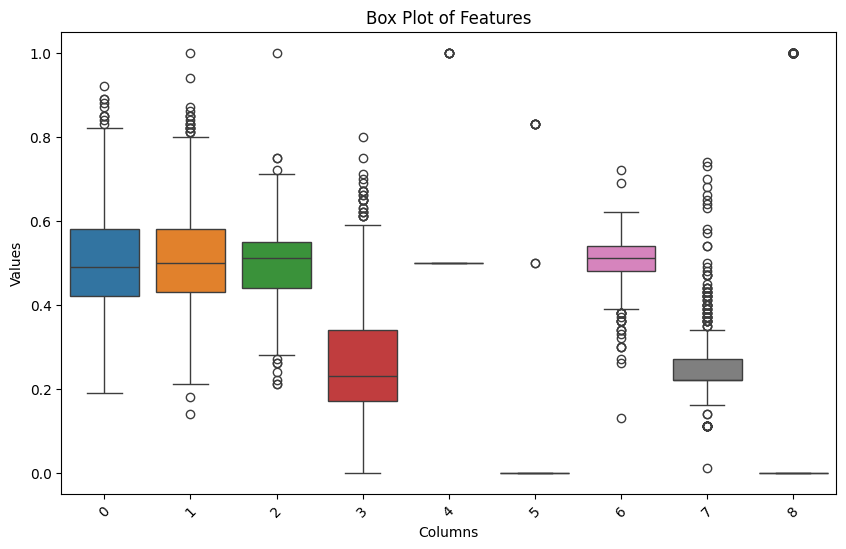

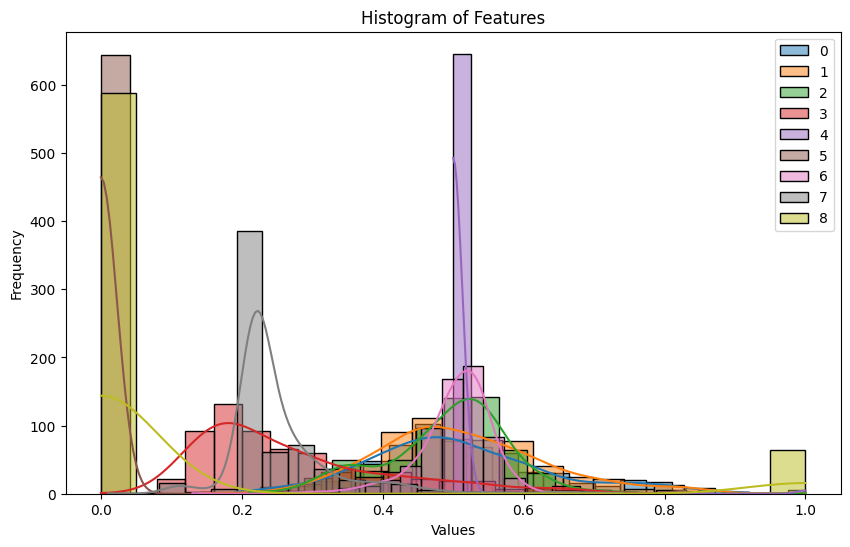

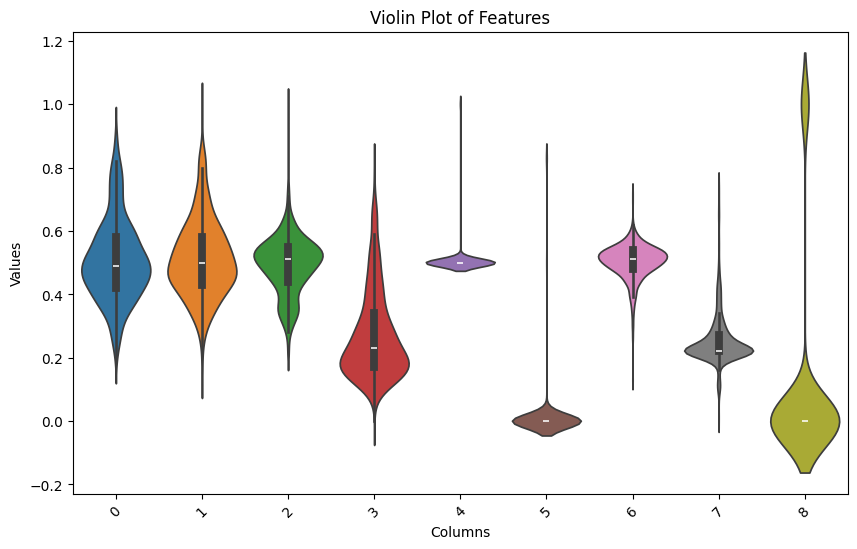

In [ ]:
numerical_columns = ['0', '1', '2', '3', '4', '5', '6', '7', '8']
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_data[numerical_columns])
plt.title('Box Plot of Features')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()
plt.figure(figsize=(10, 6))
for column in numerical_columns:
    sns.histplot(data=train_data, x=column, bins=20, kde=True, alpha=0.5, label=column)
plt.title('Histogram of Features')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()
plt.figure(figsize=(10, 6))
sns.violinplot(data=train_data[numerical_columns])
plt.title('Violin Plot of Features')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()


In [ ]:
train_data = pd.read_csv("E:/OneDrive - Wilfrid Laurier University/CP610/A2/train.csv")
test_data = pd.read_csv("E:/OneDrive - Wilfrid Laurier University/CP610/A2/test_attribute.csv")
print("Columns in train data:")
print(train_data.columns)
print("\nColumns in test data:")
print(test_data.columns)


Columns in train data:
Index(['Unnamed: 0', '0', '1', '2', '3', '4', '5', '6', '7', '8'], dtype='object')

Columns in test data:
Index(['Unnamed: 0', '0', '1', '2', '3', '4', '5', '6', '7'], dtype='object')


In [ ]:
print(df_train.columns)


Index(['yardline_100', 'quarter_seconds_remaining', 'half_seconds_remaining',
       'game_seconds_remaining', 'game_half', 'quarter_end', 'drive', 'sp',
       'qtr', 'down',
       ...
       'fumble_recovery_1_player_id', 'fumble_recovery_1_player_name',
       'fumble_recovery_2_team', 'fumble_recovery_2_yards',
       'fumble_recovery_2_player_id', 'fumble_recovery_2_player_name',
       'return_team', 'return_yards', 'penalty_team', 'penalty_yards'],
      dtype='object', length=238)


In [ ]:
column_names = ['play_id', 'game_id', 'home_team', 'away_team', 'posteam',
                'posteam_type', 'defteam', 'side_of_field', 'yardline_100', 'game_date',
                # Add all column names here
                'penalty_type',
                'defensive_two_point_attempt', 'defensive_two_point_conv',
                'defensive_extra_point_attempt', 'defensive_extra_point_conv']

if 'label_column_name' in column_names:
    # Drop the column
    df_train.drop(columns=['label_column_name'], inplace=True)
else:
    print("Column 'label_column_name' not found in the DataFrame.")


Column 'label_column_name' not found in the DataFrame.


In [ ]:
print(train_data.columns)


Index(['Unnamed: 0', '0', '1', '2', '3', '4', '5', '6', '7', '8'], dtype='object')


In [ ]:
import pandas as pd

# File paths
train_file_path = "E:\\OneDrive - Wilfrid Laurier University\\CP610\\A2\\train.csv"
test_file_path = "E:\\OneDrive - Wilfrid Laurier University\\CP610\\A2\\test_attribute.csv"

# Read the training data
train_data = pd.read_csv(train_file_path)

# Read the testing data
test_data = pd.read_csv(test_file_path)


In [ ]:
import pandas as pd

# Assuming df_train is your DataFrame and column_names is the list of column names
column_names = ['play_id', 'game_id', 'home_team', 'away_team', 'posteam',
                'posteam_type', 'defteam', 'side_of_field', 'yardline_100', 'game_date',
                # Add all column names here
                'penalty_type',
                'defensive_two_point_attempt', 'defensive_two_point_conv',
                'defensive_extra_point_attempt', 'defensive_extra_point_conv']

# Check if 'label_column_name' exists in column_names
label_column_name = 'label_column_name'
if label_column_name in column_names:
    # Drop the column if it exists
    df_train.drop(columns=[label_column_name], inplace=True)
else:
    # Print a message if the column does not exist
    print("Column 'label_column_name' not found in the DataFrame.")


Column 'label_column_name' not found in the DataFrame.


In [ ]:
import pandas as pd

# File paths
train_file_path = r"E:\OneDrive - Wilfrid Laurier University\CP610\A2\train.csv"
test_file_path = r"E:\OneDrive - Wilfrid Laurier University\CP610\A2\test_attribute.csv"

# Read the training data
train = pd.read_csv(train_file_path)

# Read the test data
test = pd.read_csv(test_file_path)


In [ ]:
import pandas as pd

# Example DataFrame creation
data = {'feature1': [1, 2, 3],
        'feature2': [4, 5, 6],
        'target_column_name': [0, 1, 0]}
df = pd.DataFrame(data)

# Accessing the target column
Y = df['target_column_name']


In [ ]:
from sklearn.metrics import f1_score


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the GBM classifier
gbm = GradientBoostingClassifier()

# Train the classifier on the training data
gbm.fit(X_train, y_train)


GradientBoostingClassifier()

In [ ]:
print("F1-score:", f1)


F1-score: 0.6666666666666666


### Briefly describe your approach in the following cell.


The coding approach involves several steps. Firstly, the training and testing data are read from the provided CSV files into Pandas DataFrames. Next, a list of columns to drop from both the training and testing DataFrames is defined based on the specified column names. These specified columns are then removed from both the training and testing DataFrames to prepare the data for model training and testing. Following this, the target column name is defined based on the actual target column in the DataFrames. The data is split into features (X) and the target variable (y) for both the training and testing datasets. A Gradient Boosting Machine (GBM) classifier is trained on the training data, and predictions are made using the trained model on the testing data. Subsequently, the F1-score is calculated based on the predicted values and the actual target values from the testing dataset, and this score is printed. Finally, the predictions are saved to a text file at the specified file path.

